## Bibliotecas

In [ ]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import LearningRateScheduler
# -------------------------------------------------------
from numpy import loadtxt
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
# -------------------------------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# -------------------------------------------------------
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

## Cargar Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Descargar el dataset

In [ ]:
# https://www.kaggle.com/datasets/blastchar/telco-customer-churn
# PATH = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
PATH = '/content/drive/MyDrive/BD/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Preparación de los datos

In [ ]:
df = pd.read_csv(PATH)
print(len(df))
df.head().T

In [ ]:
df.dtypes

In [ ]:
total_charges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)
df[total_charges.isnull()][['customerID', 'TotalCharges']]

In [ ]:
replacer = lambda str: str.lower().str.replace(' ', '_')
df.columns = replacer(df.columns.str)
for col in list(df.dtypes[df.dtypes == 'object'].index):
    df[col] = replacer(df[col].str)
df.head().T

In [ ]:
df.churn = (df.churn == 'yes').astype(int)
df.churn.head()

In [ ]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
                'phoneservice', 'multiplelines', 'internetservice',
                'onlinesecurity', 'onlinebackup', 'deviceprotection',
                'techsupport', 'streamingtv', 'streamingmovies',
                'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']
df[categorical].nunique()

In [ ]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=1)
y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

df_train.head().T

# Análisis de la importancia de las propiedades

In [ ]:
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

In [ ]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print(round(female_mean, 3))
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print(round(male_mean, 3))

In [ ]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print(round(partner_yes, 3))
partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print(round(partner_no, 3))

In [ ]:
from sklearn.metrics import mutual_info_score

calculate_mi = lambda col: mutual_info_score(col, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

In [ ]:
print(df_train_full[numerical].corrwith(df_train_full.churn))

print(round(df_train_full[df_train_full.tenure <= 2].churn.mean(), 3))
print(round(df_train_full[(df_train_full.tenure > 3) & 
                          (df_train_full.tenure <= 12)].churn.mean(), 3))
print(round(df_train_full[df_train_full.tenure > 12].churn.mean(), 3))

print(round(df_train_full[df_train_full.monthlycharges < 20].churn.mean(), 3))
print(round(df_train_full[(df_train_full.monthlycharges > 21) & 
                          (df_train_full.monthlycharges <= 50)].churn.mean(), 3))
print(round(df_train_full[df_train_full.monthlycharges > 50].churn.mean(), 3))

# Ingeniería de propiedades

In [ ]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
dict(sorted(train_dict[0].items()))

In [ ]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

In [ ]:
X_train = dv.transform(train_dict)
X_train[0]

In [ ]:
dv.get_feature_names_out()

# Entrenamiento del modelo

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

In [ ]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)
y_pred

In [ ]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

In [ ]:
churn = y_pred >= 0.5
churn

In [ ]:
# precisión del modelo con los datos de entrenamiento
round((y_val == churn).mean(), 3) 

# Modelo

In [ ]:
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)
y_pred



---



---



---



---



# Ejercicio: usar este dataset para entrenar una red neuronal

## Instalación de paquetes y biblotecas

### Instalación

In [26]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Bibliotecas

In [29]:
import pandas as pd
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np



---



### Dataset

* X_train
* y_train
* X_val
* y_val

In [30]:
# Número de atributos del conjunto de entrenamiento
X_train.shape

(3774, 45)

In [31]:
# from keras.optimizers import Adam

learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

### Entrenar el modelo

#### LearningRateScheduler

Para que la tasa de entrenamiento sea cada vez menor

In [32]:
# from keras.callbacks import LearningRateScheduler

# Determina la disminución de learning_rate en un 50% cada 250 epocas
def step_decay(epoch):
    initial_lr = 0.03
    drop = 0.5
    epochs_drop = 250
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

# create the LearningRateScheduler object
lr_scheduler = LearningRateScheduler(step_decay)

In [44]:
# define the keras model
model = Sequential()
model.add(Dense(45, input_shape=(45,), activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(1, kernel_initializer='he_uniform', activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 45)                2070      
                                                                 
 dense_7 (Dense)             (None, 45)                2070      
                                                                 
 dense_8 (Dense)             (None, 1)                 46        
                                                                 
Total params: 4,186
Trainable params: 4,186
Non-trainable params: 0
_________________________________________________________________


In [45]:
# from keras.optimizers import Adam

learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

In [46]:
# compile the keras model
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy', 'mse']
)

In [47]:
# fit the keras model on the dataset
history = model.fit(
    X_train,
    y_train,
    validation_split=0.25,
    epochs=500,
    batch_size=256,
    verbose=0
)

### Medir la precisión del modelo

In [48]:
# evaluate the keras model
_, accuracy, mse = model.evaluate(X_val, y_val)
print('Accuracy: %.2f' % (accuracy*100))
print('MSE: %.4f' % (mse))

59/59 [==============================] - 0s 2ms/step - loss: 0.4418 - accuracy: 0.8043 - mse: 0.1402
Accuracy: 80.43
MSE: 0.1402


## Representación gráfica

dict_keys(['loss', 'accuracy', 'mse', 'val_loss', 'val_accuracy', 'val_mse'])


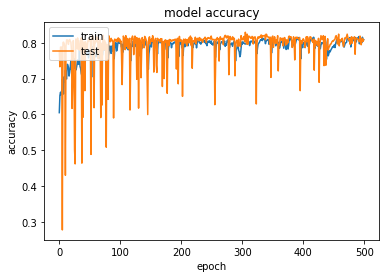

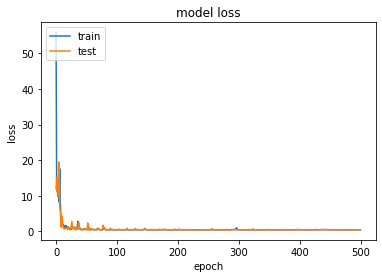

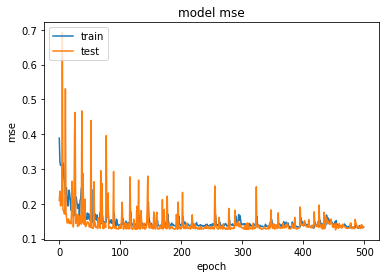

In [49]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for mse
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



---



---



---



## . . .





# Ejercicio: usar este dataset para entrenar una red neuronal con dos nodos de salida

## Conceptos teóricos

> * [Machine Learning Glossary](https://developers.google.com/machine-learning/glossary?hl=en)

> * [Tutorial de problema de clasificación multiclase con Redes Neuronales usando Keras](https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/)

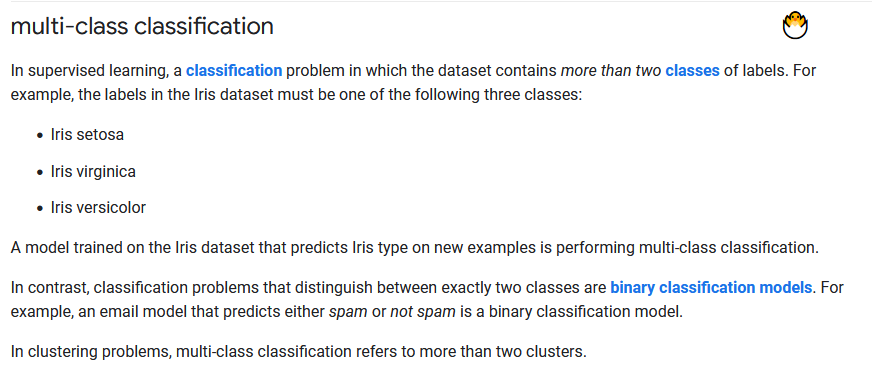

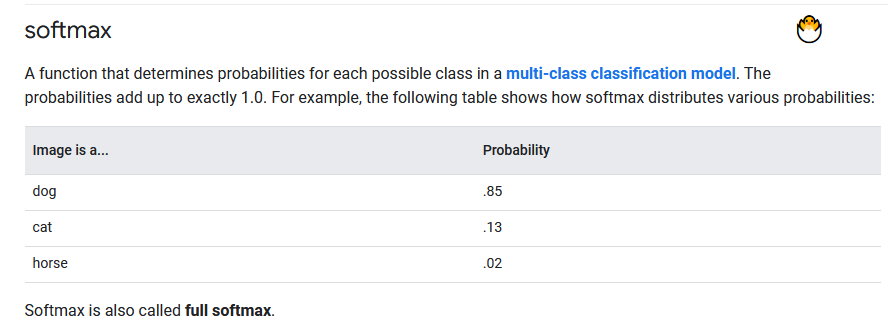

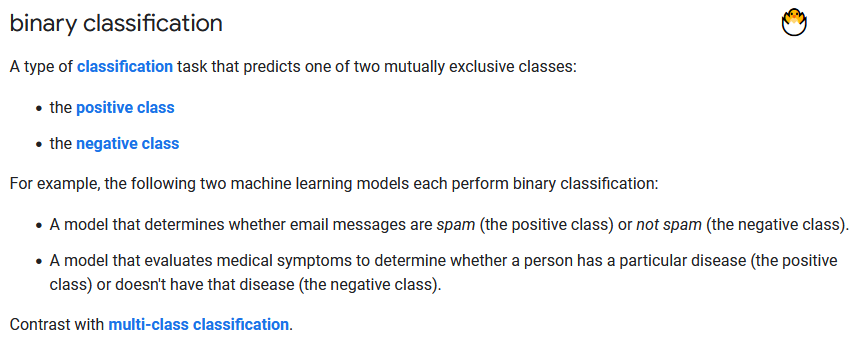

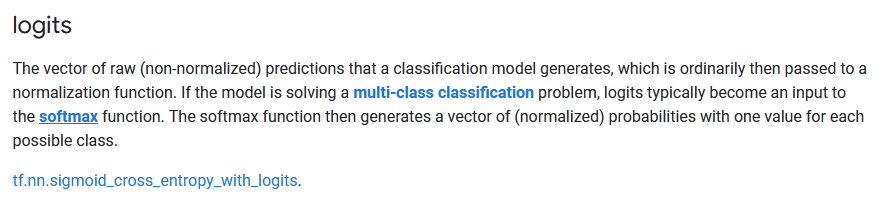

## Cargar (otra vez) el dataset

In [50]:
df3 = pd.read_csv(PATH)

In [51]:
print(len(df3))

7043


## Pre-proceso

In [52]:
total_charges = pd.to_numeric(df3.TotalCharges, errors='coerce')
df3.TotalCharges = pd.to_numeric(df3.TotalCharges, errors='coerce')
df3.TotalCharges = df3.TotalCharges.fillna(0)
df3[total_charges.isnull()][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,0.0
753,3115-CZMZD,0.0
936,5709-LVOEQ,0.0
1082,4367-NUYAO,0.0
1340,1371-DWPAZ,0.0
3331,7644-OMVMY,0.0
3826,3213-VVOLG,0.0
4380,2520-SGTTA,0.0
5218,2923-ARZLG,0.0
6670,4075-WKNIU,0.0


In [53]:
replacer = lambda str: str.lower().str.replace(' ', '_')
df3.columns = replacer(df3.columns.str)
for col in list(df3.dtypes[df3.dtypes == 'object'].index):
    df3[col] = replacer(df3[col].str)
df3.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


## Convertir el atributo 'churn' en dos columnas complementarias

Cambiar el tido de dato de la columna 'churn' de booleano a número entero

In [54]:
df3.churn = (df3.churn == 'yes').astype(int)
df3.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

Creamos dos columnas a partir del atributo 'churn'

In [55]:
df4 = (df3.churn == 1).astype(int)
df5 = (df3.churn == 0).astype(int)

Cambiamos el nombre de las nuevas columnas

In [56]:
df4.name = 'churn_true'
df4.head()

0    0
1    0
2    1
3    0
4    1
Name: churn_true, dtype: int64

In [57]:
df5.name = 'churn_false'
df5.head()

0    1
1    1
2    0
3    1
4    0
Name: churn_false, dtype: int64

Quitamos la antigua columna `churn`

In [58]:
df3.drop(columns=['churn'], inplace=True)

Unimos las dos nuevas columnas al dataframe principal

In [59]:
df3 = pd.concat([df3, df4, df5], axis=1)

## División de los atributos entre numéricos y categóricos

In [60]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
                'phoneservice', 'multiplelines', 'internetservice',
                'onlinesecurity', 'onlinebackup', 'deviceprotection',
                'techsupport', 'streamingtv', 'streamingmovies',
                'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']
df3[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Separación de datos: prueba y entrenamiento

In [61]:
# from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df3, test_size=0.2, random_state=1)

df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=1)
y_train = df_train[['churn_true', 'churn_false']]
y_val = df_val[['churn_true', 'churn_false']]

df_train.drop(columns=['churn_true', 'churn_false'], inplace=True)
df_val.drop(columns=['churn_true', 'churn_false'], inplace=True)

df_train.head().T

,4204,7034,5146,5184,1310
customerid,4395-pzmsn,0639-tsiqw,3797-fkogq,7570-welny,6393-wryze
gender,male,female,male,female,female
seniorcitizen,1,0,0,0,0
partner,no,no,no,yes,yes
dependents,no,no,yes,no,no
tenure,5,67,11,68,34
phoneservice,yes,yes,yes,yes,yes
multiplelines,no,yes,yes,yes,yes
internetservice,fiber_optic,fiber_optic,fiber_optic,fiber_optic,fiber_optic
onlinesecurity,no,yes,no,yes,no


In [62]:
y_val

,churn_true,churn_false
565,0,1
199,0,1
6738,0,1
2504,1,0
556,0,1
...,...,...
170,0,1
4321,0,1
650,1,0
254,0,1


## Ingeniería de propiedades

In [63]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
dict(sorted(train_dict[0].items()))

{'contract': 'month-to-month',
 'dependents': 'no',
 'deviceprotection': 'no',
 'gender': 'male',
 'internetservice': 'fiber_optic',
 'monthlycharges': 85.55,
 'multiplelines': 'no',
 'onlinebackup': 'yes',
 'onlinesecurity': 'no',
 'paperlessbilling': 'yes',
 'partner': 'no',
 'paymentmethod': 'electronic_check',
 'phoneservice': 'yes',
 'seniorcitizen': 1,
 'streamingmovies': 'yes',
 'streamingtv': 'no',
 'techsupport': 'no',
 'tenure': 5,
 'totalcharges': 408.5}

In [64]:
# from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [65]:
X_train = dv.transform(train_dict)
X_train[0]

array([  1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   1.  ,   0.  ,  85.55,   1.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  ,   0.  ,   0.  ,
         1.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         1.  ,   1.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  ,   0.  ,
         1.  ,   0.  ,   0.  ,   5.  , 408.5 ])

In [66]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

## Definir el optimizador del modelo (para Red Neuronal)

In [67]:
# from keras.optimizers import Adam

learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

## LearningRateScheduler

Para que la tasa de entrenamiento sea cada vez menor

In [68]:
# from keras.callbacks import LearningRateScheduler

# Determina la disminución de learning_rate en un 50% cada 250 epocas
def step_decay(epoch):
    initial_lr = 0.03
    drop = 0.5
    epochs_drop = 250
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

# create the LearningRateScheduler object
lr_scheduler = LearningRateScheduler(step_decay)

## Definir el modelo

In [69]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(45, input_shape=(45,), activation='relu'))
    model.add(Dense(22, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    # Compile model
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    return model

In [70]:
# define the keras model
estimator = KerasClassifier(
    build_fn=baseline_model,
    epochs=500,
    batch_size=256,
    verbose=0
)

<ipython-input-70-84bf77aee5c1>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(


## Entrenar y evaluar el modelo con validación cruzada: CROSS_VAL_SCORE()

In [71]:
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 75.83% (3.72%)




---



---



# Repetir el ejercicio pero entrenando el modelo con `.fit()`

## Definir el optimizador del modelo (para Red Neuronal)

In [72]:
# from keras.optimizers import Adam

learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

## LearningRateScheduler

Para que la tasa de entrenamiento sea cada vez menor

In [73]:
# from keras.callbacks import LearningRateScheduler

# Determina la disminución de learning_rate en un 50% cada 250 epocas
def step_decay(epoch):
    initial_lr = 0.03
    drop = 0.5
    epochs_drop = 250
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

# create the LearningRateScheduler object
lr_scheduler = LearningRateScheduler(step_decay)

## Definir el modelo

In [74]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(45, input_shape=(45,), activation='relu'))
    model.add(Dense(22, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    # Compile model
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    return model

In [75]:
model = baseline_model()

## Entrenar el modelo

In [ ]:
# Entrenar el modelo
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=128,
    verbose=0
)

## Medir la precisión del modelo

In [79]:
# evaluate the keras model
_, accuracy = model.evaluate(X_val, y_val)
print('Accuracy: %.2f' % (accuracy*100))

59/59 [==============================] - 0s 2ms/step - loss: 0.4613 - accuracy: 0.7629
Accuracy: 76.29


## Visualización de resultados
Podemos visualizar la precisión y la pérdida del modelo durante el entrenamiento utilizando la biblioteca Matplotlib. Esto nos permite ver cómo se desempeña el modelo en los datos de entrenamiento y prueba a medida que avanza el entrenamiento.

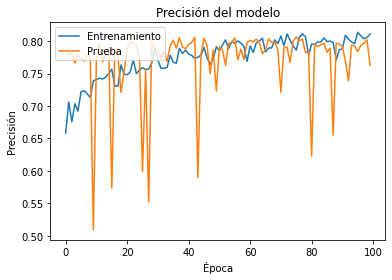

In [80]:
# Graficar la precisión del modelo durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

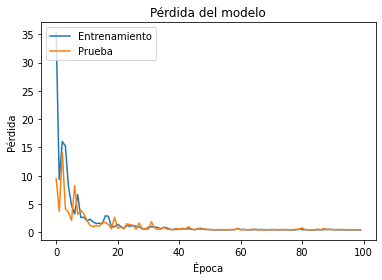

In [81]:
# Graficar la pérdida del modelo durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

## Visualización del modelo
Para visualizar el modelo y sus neuronas con matplotlib podemos utilizar la función plot_model de Keras, que nos permite generar una imagen del modelo. Además, también podemos utilizar la librería pyplot de matplotlib para visualizar la estructura del modelo y sus neuronas.

Para utilizar plot_model, debemos importar la función desde Keras y luego llamarla con nuestro modelo como argumento. Por ejemplo:

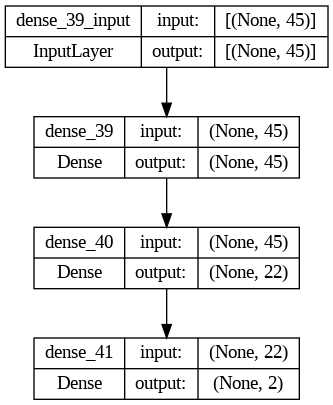

In [82]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Esto generará una imagen del modelo en un archivo llamado "model.png" y mostrará las formas y nombres de las capas.

Para visualizar la estructura del modelo y sus neuronas utilizando pyplot, podemos hacer lo siguiente:

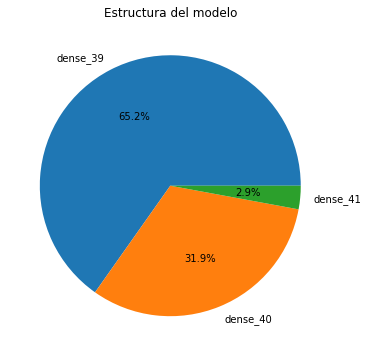

In [83]:
import matplotlib.pyplot as plt

# Obtener la estructura del modelo
model_layers = [layer.output for layer in model.layers]
layer_names = [layer.name for layer in model.layers]

# Crear el diagrama
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Estructura del modelo')
ax.axis('off')
_ = plt.pie([layer.shape[-1] for layer in model_layers], labels=layer_names, autopct='%1.1f%%')
plt.show()



---



---



---

